In [1]:
import cv2
import argparse
import imutils
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.pylabtools import figsize
figsize(15, 6)

In [2]:
#im = Image.open("test_frame5.png")
#im.show()

In [188]:
image = cv2.imread("test_frameb5.png")
image = image[80:260 ,230:450]
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 80, 255, cv2.THRESH_BINARY)[1]

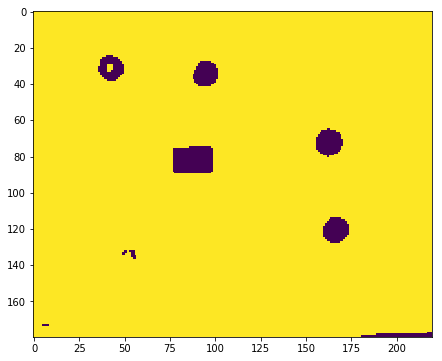

In [189]:
plt.imshow(thresh)
plt.show()

In [ ]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]

In [ ]:
# loop over the contours
for c in cnts:
	# compute the center of the contour
	M = cv2.moments(c)
	cX = int(M["m10"] / M["m00"])
	cY = int(M["m01"] / M["m00"])
 
	# draw the contour and center of the shape on the image
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
	cv2.circle(image, (cX, cY), 7, (255, 255, 255), -1)
	cv2.putText(image, "center", (cX - 20, cY - 20),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
 
	# show the image
	cv2.imshow("Image", image)
	cv2.waitKey(0)

In [190]:
def detect_circle(image):
    output = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.threshold(blurred, 80, 255, cv2.THRESH_BINARY)[1]
    #circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.2 100)
    circles = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, 1, 2, np.array([]), 200, 8, 4, 8)
    
    #cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
    #cv2.CHAIN_APPROX_SIMPLE)
    #cnts = cnts[0] if imutils.is_cv2() else cnts[1]
    
    if circles is not None:
        # convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")
        print(circles)

    # loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # draw the circle in the output image, then draw a rectangle
            # corresponding to the center of the circle
            cv2.circle(output, (x, y), r, (0, 255, 0), 4)
            cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        out_image=np.hstack([image, output])
        
    #for c in cnts:
    #    # compute the center of the contour
    #    M = cv2.moments(c)
    #    cX = int(M["m10"] / M["m00"])
    #    cY = int(M["m01"] / M["m00"])
    #    
    #    # draw the contour and center of the shape on the image
    #    cv2.drawContours(out_image, [c], -1, (0, 255, 0), 2)
    #    cv2.circle(out_image, (cX, cY), 7, (255, 255, 255), -1)
    #    cv2.putText(out_image, "center", (cX - 20, cY - 20),
    #        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)    
    #    
    plt.imshow(out_image)
    plt.show()

[[162  72   7]
 [166 120   7]
 [ 94  34   7]
 [ 42  30   7]
 [ 42  32   6]]


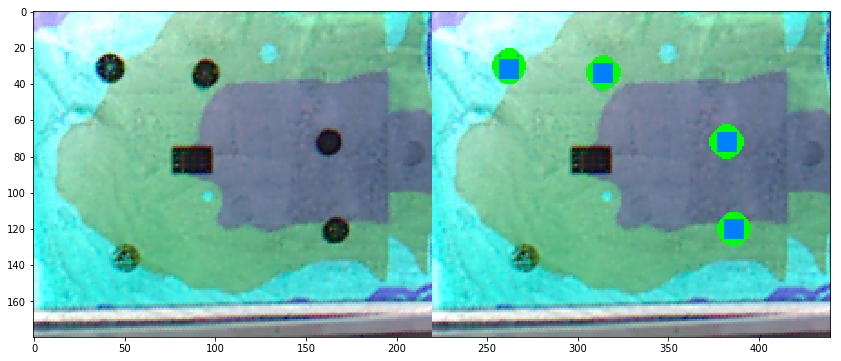

In [191]:
detect_circle(image)

In [ ]:
plt.imshow(thresh)
plt.show()

In [120]:
circles = cv2.HoughLinesP(thresh, cv2.HOUGH_GRADIENT, 1, 2, np.array([]), 200, 8)

In [1]:
import cv2
import argparse
import imutils
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.pylabtools import figsize
figsize(15, 6)

In [200]:
image = cv2.imread("test_frameb5.png")
raw_image = image[80:260 ,230:450]

#cv2.imshow('Original Image', raw_image)
#cv2.waitKey(0)

bilateral_filtered_image = cv2.bilateralFilter(raw_image, 5, 175, 175)
#cv2.imshow('Bilateral', bilateral_filtered_image)
#cv2.waitKey(0)

gray = cv2.cvtColor(bilateral_filtered_image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 80, 255, cv2.THRESH_BINARY)[1]
edge_detected_image = cv2.Canny(thresh, 75, 200)
cv2.imshow('Edge', edge_detected_image)
#cv2.waitKey(0)

_, contours, hierarchy = cv2.findContours(edge_detected_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_list = []
for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        #cv2.circle(raw_image, (cX, cY), 7, (255, 255, 255), -1)
    else:
        cX = 0
        cY = 0
    
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    if ((len(approx) > 8) & (len(approx) < 23) & (area > 30) ):
        contour_list.append(contour)

cv2.drawContours(raw_image, contour_list,  -1, (255,0,0), 2)
cv2.imshow('Objects Detected',raw_image)
#cv2.waitKey(0)

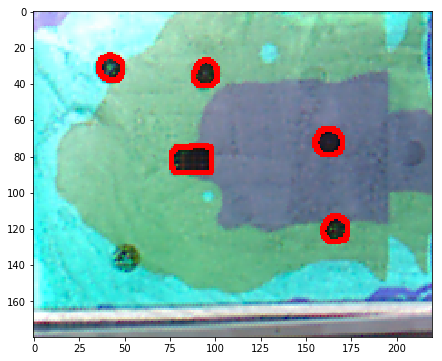

In [201]:
plt.imshow(raw_image)
plt.show()

In [85]:
M

{'m00': 123165.0,
 'm01': 17624325.0,
 'm02': 2797322205.0,
 'm03': 463173473055.0,
 'm10': 11951085.0,
 'm11': 1765091640.0,
 'm12': 281083913280.0,
 'm20': 1563395565.0,
 'm21': 239169907530.0,
 'm30': 234663116835.0,
 'mu02': 275365222.8571429,
 'mu03': -15916918154.35376,
 'mu11': 54948286.42857146,
 'mu12': -6074681781.607544,
 'mu20': 403744424.84472036,
 'mu21': 4791838885.961258,
 'mu30': 4608789995.973022,
 'nu02': 0.018152417346650813,
 'nu03': -0.002989790138983502,
 'nu11': 0.0036222592576703244,
 'nu12': -0.0011410515221594642,
 'nu20': 0.026615333719781475,
 'nu21': 0.0009000858401050396,
 'nu30': 0.0008657024399435576}

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import imutils

# images = []
# for img in os.listdir("images/"):
#     im = cv2.imread("images/"+img)
#     images.append(cv2.cvtColor(im, cv2.COLOR_BGR2GRAY))

    
# images = np.array(images)[:, 80:240 ,230:450]

fp = "images/test_frameb5.png"
im = cv2.imread("images/"+img)
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im = cv2.medianBlur(im, 5)
im = im[80:240 ,230:450]
thresh = cv2.threshold(im, 70, 255, cv2.THRESH_BINARY)[1]
canny = cv2.Canny(thresh, 2, 2)
circles = cv2.HoughCircles(canny, cv2.HOUGH_GRADIENT, 1, 20, 
              param1=30,
              param2=15,
              minRadius=0,
              maxRadius=0)

plt.figure(figsize=(10,10))
#plt.scatter(circles[0,0,0], circles[0,0,1], color="red")
for c in range(circles.shape[1]):
        plt.scatter(circles[0,c,0], circles[0,c,1], color="red")

plt.imshow(im, cmap="Greys")
plt.imshow(canny, cmap="jet", alpha=0.4)